In [51]:
# Imports
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [52]:
zillow_time_series = pd.read_csv("./datasets/zri_AllHomes.csv")

zillow_time_series

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2010-11,2010-12,2011-01,...,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10
0,61639,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,...,3691,3699,3700,3696,3685,3676,3692,3713,3740,3735
1,84654,60657,Chicago,IL,Chicago,Cook,2,1862.0,1863.0,1861.0,...,2106,2093,2079,2069,2073,2085,2094,2100,2104,2108
2,61637,10023,New York,NY,New York,New York,3,NaN,NaN,NaN,...,3922,3926,3946,3946,3979,4006,4067,4115,4169,4173
3,84616,60614,Chicago,IL,Chicago,Cook,4,2127.0,2123.0,2108.0,...,2355,2343,2325,2312,2309,2323,2327,2325,2320,2314
4,93144,79936,El Paso,TX,El Paso,El Paso,5,1082.0,1078.0,1075.0,...,998,1000,1001,1001,1000,999,998,998,999,1003
5,61616,10002,New York,NY,New York,New York,6,NaN,NaN,NaN,...,3594,3584,3583,3588,3607,3627,3673,3704,3751,3751
6,84640,60640,Chicago,IL,Chicago,Cook,7,1538.0,1533.0,1525.0,...,1647,1650,1654,1658,1658,1656,1651,1652,1651,1656
7,61807,10467,New York,NY,New York,Bronx,8,NaN,NaN,NaN,...,1666,1674,1694,1713,1725,1735,1746,1754,1759,1761
8,91733,77084,Houston,TX,Houston,Harris,9,1271.0,1262.0,1255.0,...,1439,1433,1424,1416,1411,1414,1420,1425,1428,1428
9,97564,94109,San Francisco,CA,San Francisco,San Francisco,10,2958.0,2967.0,2987.0,...,4464,4453,4452,4454,4452,4448,4443,4436,4427,4417


In [53]:
headers = list(zillow_time_series)

# headers

In [54]:
# Filter to seattle on state and Metro area. 

seattle_rent = zillow_time_series.loc[(zillow_time_series["State"] == "WA") & (zillow_time_series["Metro"] == "Seattle")]
len(seattle_rent)

all_zipcodes = []

for zipcode in seattle_rent["RegionName"]:
    all_zipcodes.append(zipcode)

all_zipcodes

[98052,
 98103,
 98012,
 98133,
 98115,
 98208,
 98034,
 98122,
 98125,
 98270,
 98003,
 98023,
 98391,
 98118,
 98387,
 98204,
 98105,
 98258,
 98033,
 98004,
 98109,
 98042,
 98058,
 98092,
 98102,
 98223,
 98036,
 98026,
 98056,
 98198,
 98006,
 98087,
 98155,
 98117,
 98374,
 98032,
 98031,
 98203,
 98059,
 98002,
 98107,
 98444,
 98201,
 98499,
 98168,
 98144,
 98116,
 98030,
 98290,
 98119,
 98038,
 98027,
 98466,
 98498,
 98121,
 98335,
 98029,
 98007,
 98404,
 98445,
 98001,
 98146,
 98021,
 98271,
 98405,
 98011,
 98106,
 98112,
 98037,
 98040,
 98373,
 98409,
 98072,
 98126,
 98338,
 98372,
 98375,
 98188,
 98101,
 98406,
 98199,
 98008,
 98272,
 98371,
 98178,
 98275,
 98407,
 98055,
 98020,
 98292,
 98166,
 98022,
 98074,
 98028,
 98043,
 98296,
 98108,
 98177,
 98005,
 98053,
 98104,
 98075,
 98422,
 98136,
 98408,
 98057,
 98332,
 98467,
 98045,
 98321,
 98070,
 98065,
 98390,
 98360,
 98148,
 98077,
 98019,
 98424,
 98354,
 98403,
 98328,
 98446,
 98252,
 98418,
 98327,


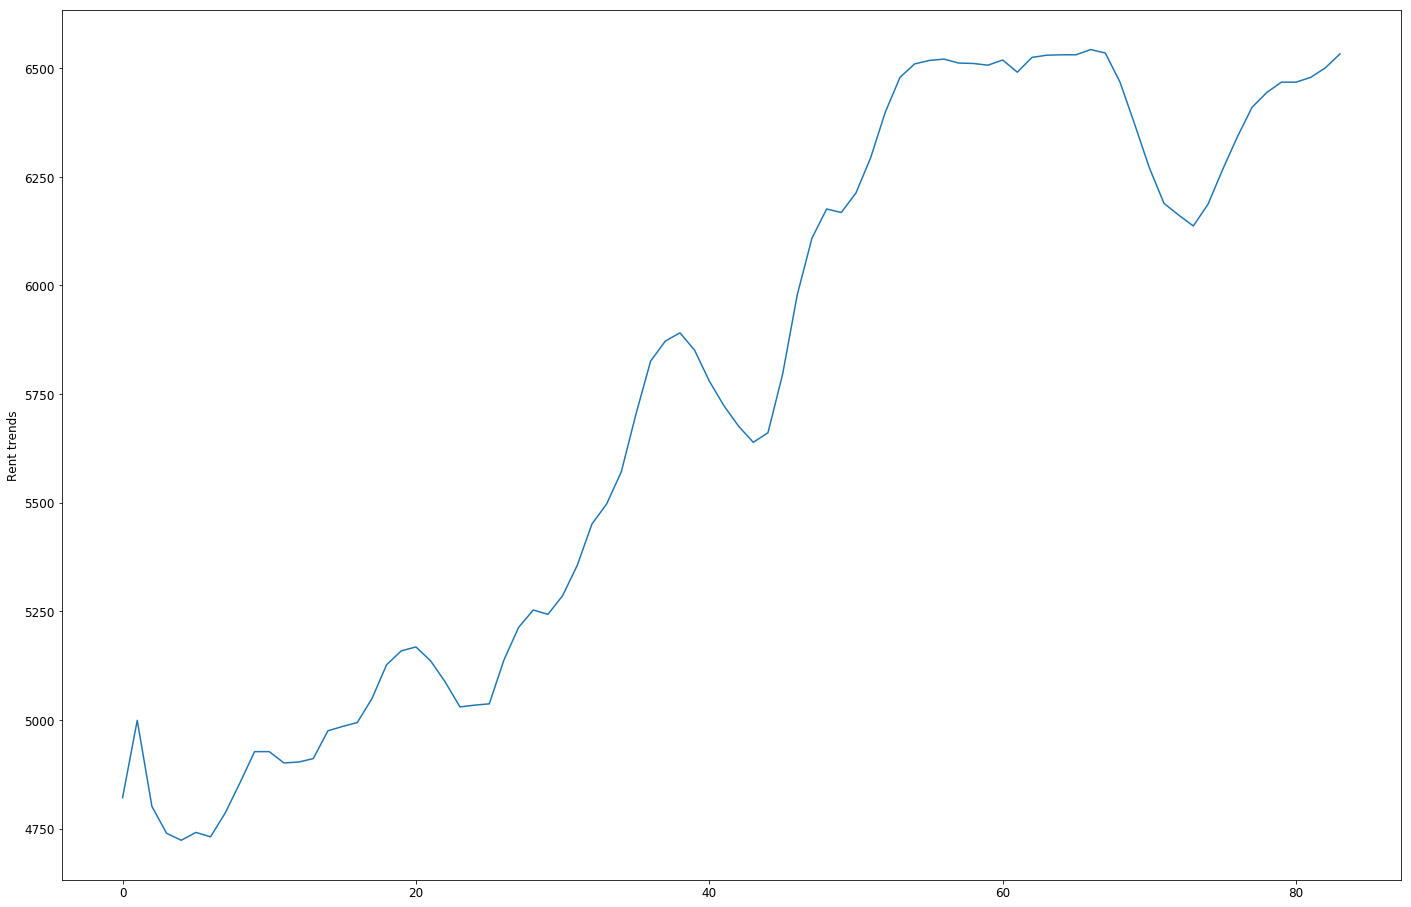

In [49]:
# Make a time series chart for a single zipcode
months = list(seattle_rent)[7:]
months

zipcode = 94010
zipcode_rent = zillow_time_series.loc[zillow_time_series["RegionName"] == zipcode]
zipcode_rent
zipcode_time_series = zipcode_rent.iloc[:, 7:]

time_series_data = []
for month in months:
    time_series_data.append(zipcode_time_series[month].values[0])

plt.plot(time_series_data)
plt.ylabel('Rent trends')
plt.figure(figsize=(4000,100))
plt.show()

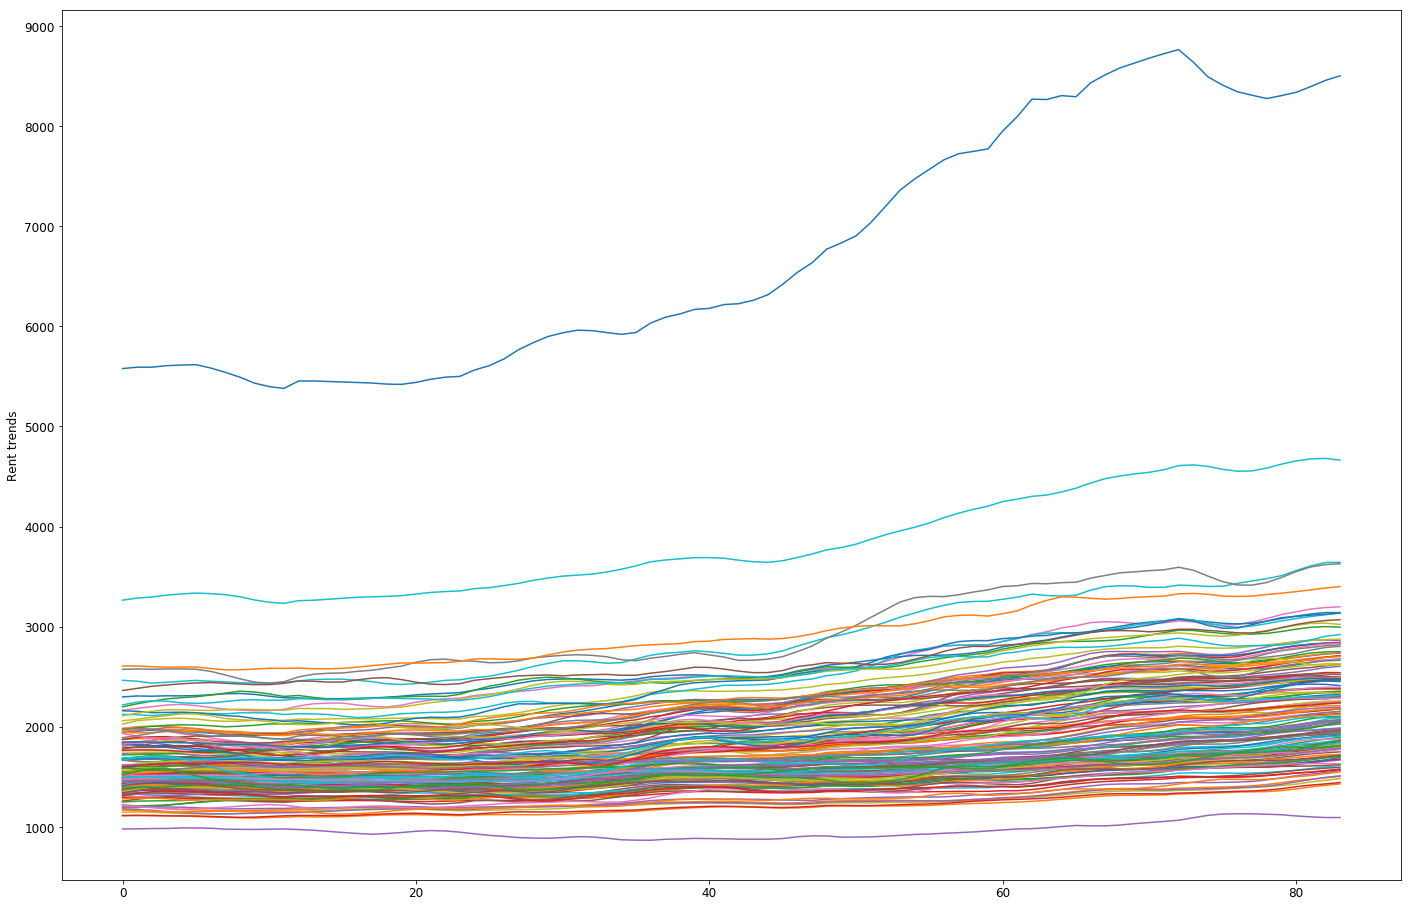

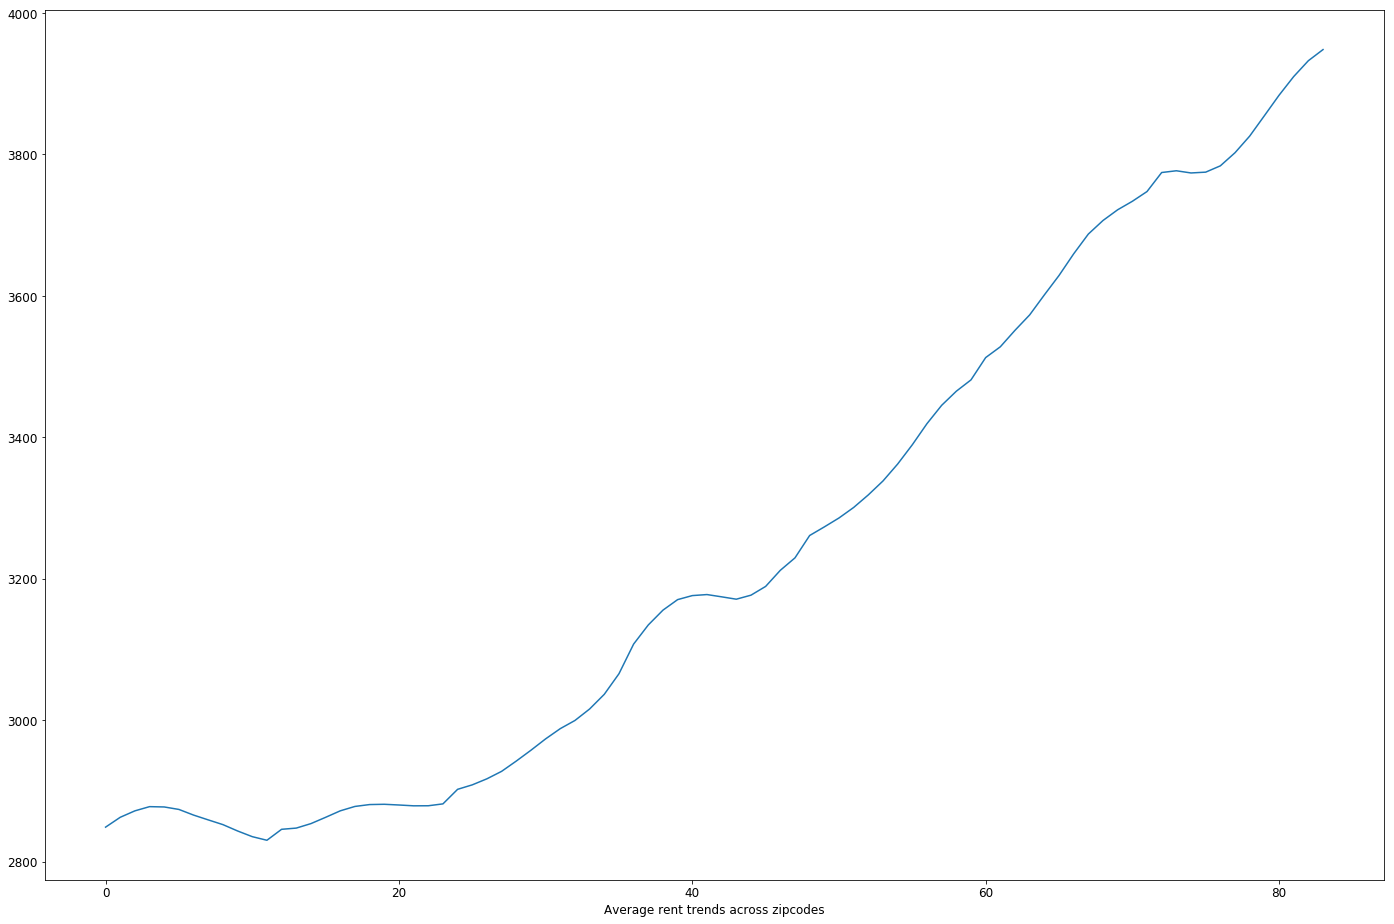

In [50]:
# # Make a time series chart for all zipcodes in Seattle. 
x = np.arange(84)
average_zipcode_time_series = np.array([0] * 84)
zipcode_to_rent_dict = {}

for zipcode in all_zipcodes:
    zipcode_rent = zillow_time_series.loc[zillow_time_series["RegionName"] == zipcode]
    zipcode_time_series = zipcode_rent.iloc[:, 7:]
    time_series_data = []
    for month in months:
        time_series_data.append(zipcode_time_series[month].values[0])
        
    zipcode_to_rent_dict[zipcode] = time_series_data
    average_zipcode_time_series = average_zipcode_time_series + time_series_data
    plt.plot(x, time_series_data)

plt.ylabel('Rent trends')
plt.show()

# plt.figure(figsize=(8.0, 5.0))
# plt.savefig("Rent_All_zipcodes")


average_zipcode_time_series /= 84
# average_zipcode_time_series

plt.plot(x, average_zipcode_time_series)
plt.xlabel("Average rent trends across zipcodes")
plt.show()

In [51]:
income_series_data = pd.read_csv("./income_time_series.csv")

# Access one row.
# income_series_data.loc[0]

# Access one column
# income_series_data["Unnamed: 0"]

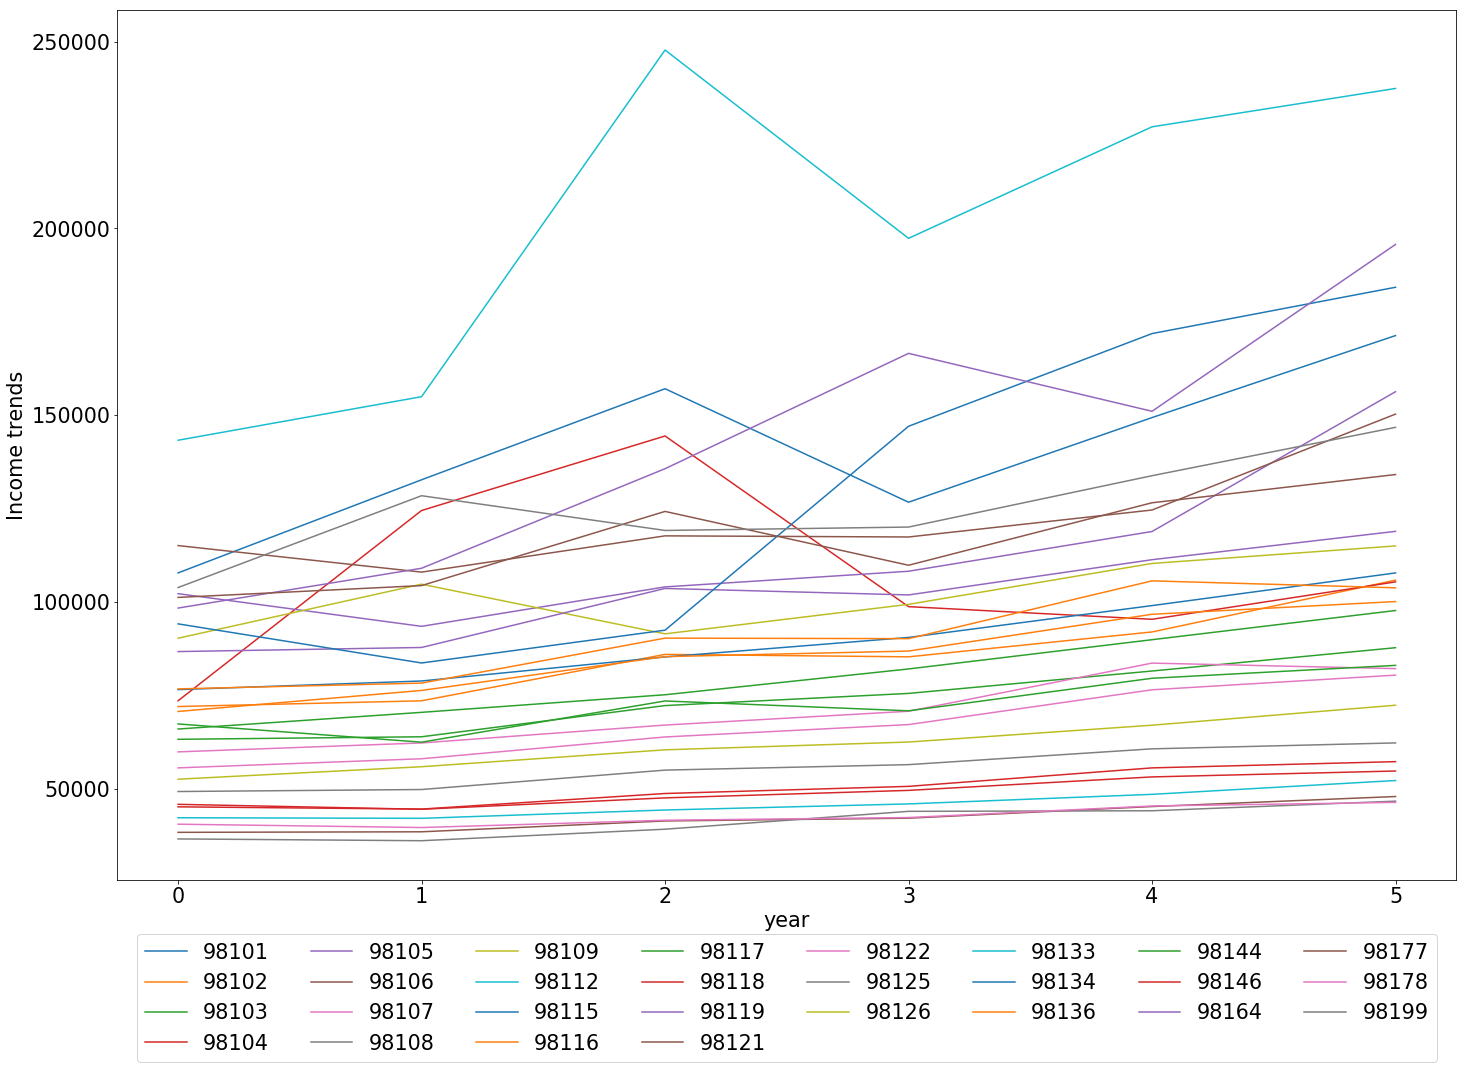

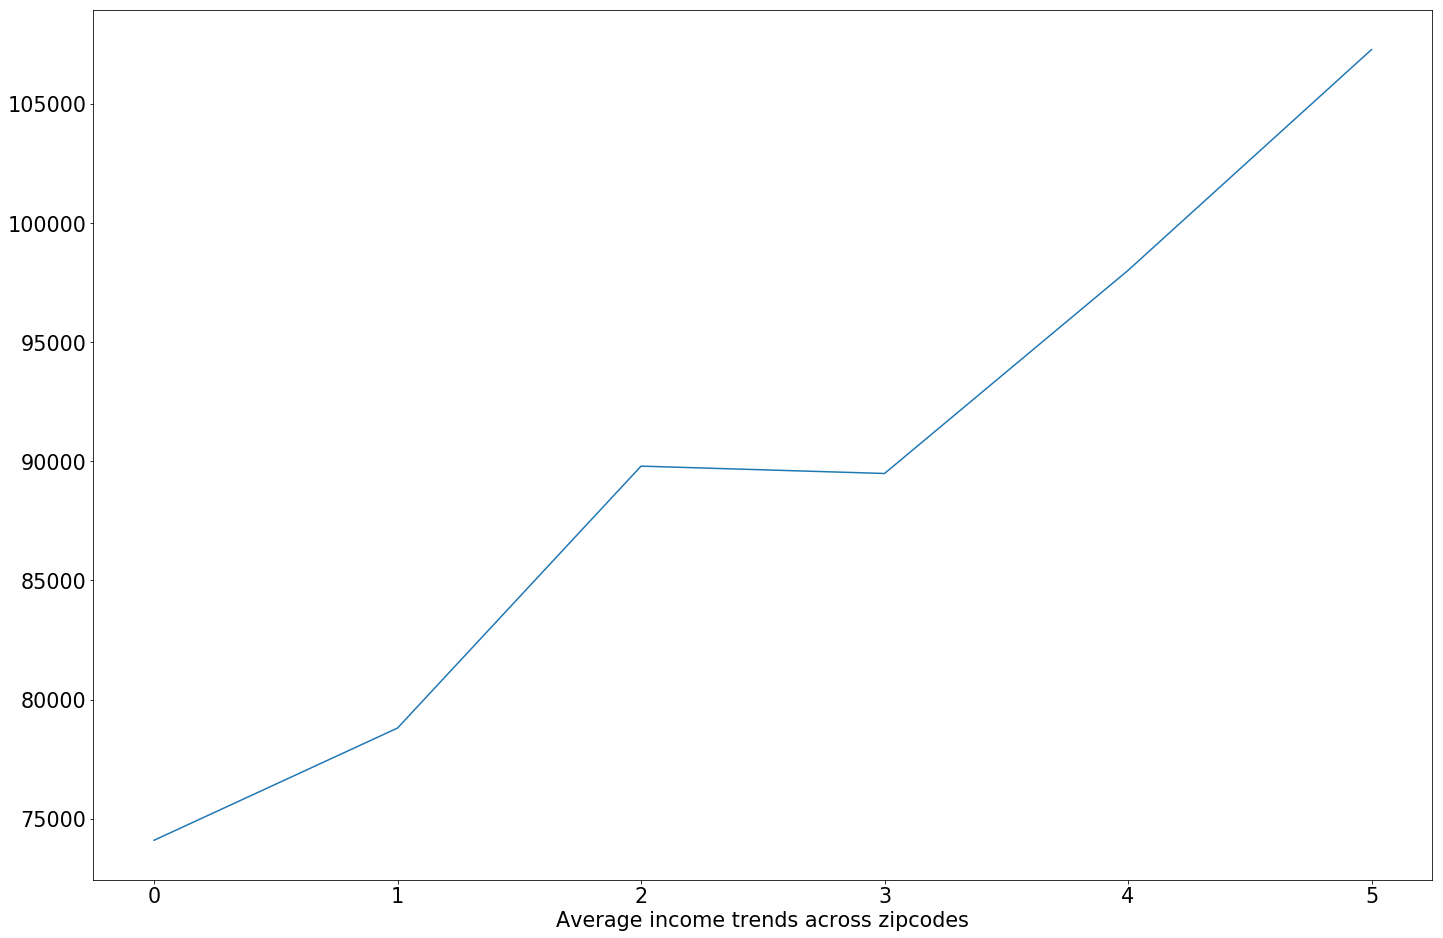

ValueError: operands could not be broadcast together with shapes (26,) (6,) (26,) 

In [70]:
income_zipcodes = income_series_data["Unnamed: 0"].values
income_zipcodes

income_years = ["2010", "2011", "2012", "2013", "2014", "2015"]
x = np.arange(6)

zipcode_to_income_dict = {}

income_time_series = []
average_income_time_series = np.array([0.0] * 6)
zipSet = []

for i in range(len(income_series_data)):
    
    zipcode = int(income_series_data.loc[i]["Unnamed: 0"])

    # Append income for all years for that row.
    income_time_series.append(income_series_data.loc[i][income_years[0]])
    income_time_series.append(income_series_data.loc[i][income_years[1]])
    income_time_series.append(income_series_data.loc[i][income_years[2]])
    income_time_series.append(income_series_data.loc[i][income_years[3]])
    income_time_series.append(income_series_data.loc[i][income_years[4]])
    income_time_series.append(income_series_data.loc[i][income_years[5]])
    
    zipcode_to_income_dict[zipcode] = income_time_series
    average_income_time_series += income_time_series
    line = plt.plot(x, income_time_series)
    income_time_series = []
    zipSet.append(zipcode)

# ## Change size of Drawing
# fig_size = plt.rcParams["figure.figsize"]
# print("Current figure size: " + str(fig_size))
# #fig_size[0] = 24
# #fig_size[1] = 16

# plt.rcParams["legend.fontsize"] = 'xx-large'
# print("current legend font size: " + str(legend_size))
# #plt.rcParams["font.size"] = 12.0
# plt.rcParams["axes.labelsize"] = 'xx-large'
# plt.rcParams["ytick.labelsize"] = 'xx-large'
# plt.rcParams["figure.figsize"] = fig_size
# ##

plt.ylabel('Income trends')
plt.xlabel("year")
plt.legend(zipSet, loc="upper center", ncol=8, bbox_to_anchor=(0.5, -0.05))
plt.show()

average_income_time_series /= 28
plt.plot(x, average_income_time_series)
plt.xlabel("Average income trends across zipcodes")
plt.show()

# plt.plot()
# plt.plot()
# plt.xlabel()
# plt.show()

# zips = set(zipcode_to_income_dict.keys()).intersection(set(zipcode_to_rent_dict.keys()))
# average_income = np.array([0.0] * 6)
# average_rent = np.array([0.0] * 6)

# for zip in zips:
#     average_income += zipcode_to_income_dict[zip]
#     average_rent += zipcode_to_rent_dict[zip]

# average_income /= len(zips)
# average_rent /= len(zips)

# average_income

In [57]:
# Calculate Rent as percentage of income

income_years
income_zipcodes
zipcode_to_income_dict[int(income_zipcodes[1])]
shortened_zipcode_to_rent_dict = {}


for zipcode in income_zipcodes:
    if zipcode in zipcode_to_rent_dict:
        shortened_zipcode_to_rent_dict[zipcode] = [zipcode_to_rent_dict[zipcode][0],
                                        zipcode_to_rent_dict[zipcode][12], 
                                        zipcode_to_rent_dict[zipcode][24], 
                                        zipcode_to_rent_dict[zipcode][36], 
                                        zipcode_to_rent_dict[zipcode][48],
                                        zipcode_to_rent_dict[zipcode][60]]

# shortened_zipcode_to_rent_dict

Current figure size: [24.0, 16.0]
legend location is: best


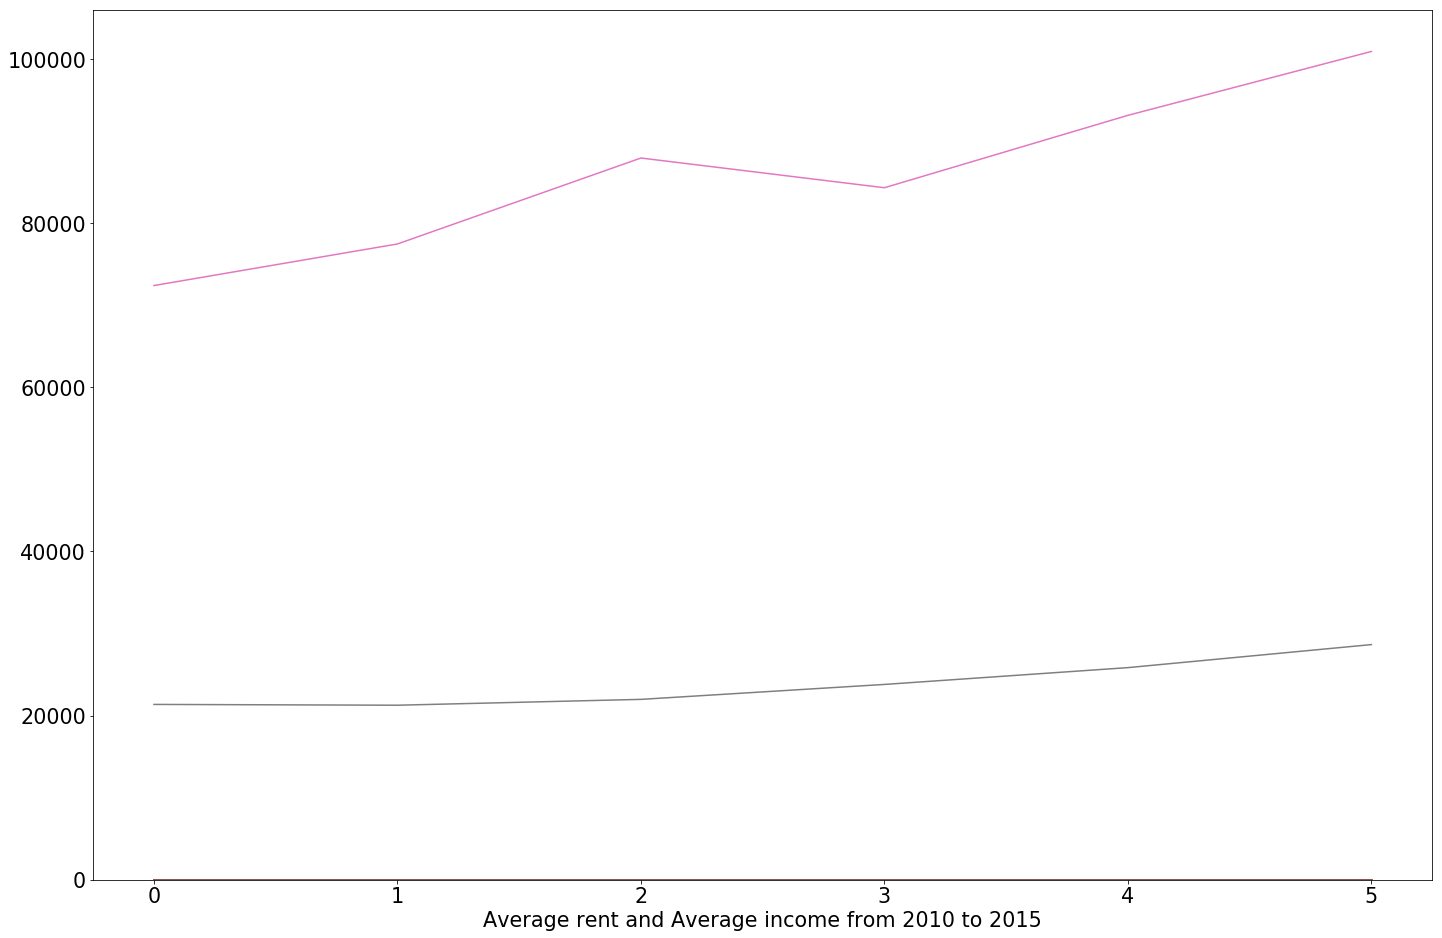

KeyError: 'inline%'

In [84]:
x = np.arange(6)

average_income = np.array([0.0] * 6)
average_rent = np.array([0.0] * 6)
average_rent_over_income = np.array([0.0] * 6)

for zipcode in shortened_zipcode_to_rent_dict:
    rent = np.array(shortened_zipcode_to_rent_dict[zipcode])
    income = np.array(zipcode_to_income_dict[zipcode])
    average_rent += rent * 12
    average_income += income
    rent_over_income = rent * 12 / income
    average_rent_over_income = rent_over_income
    plt.plot(x, rent_over_income)
    
average_income /= len(shortened_zipcode_to_rent_dict)
average_rent /= len(shortened_zipcode_to_rent_dict)
average_rent_over_income /= len(shortened_zipcode_to_rent_dict)

## Change size of Drawing
fig_size = plt.rcParams["figure.figsize"]
print("Current figure size: " + str(fig_size))
#fig_size[0] = 24
#fig_size[1] = 16

plt.rcParams["legend.fontsize"] = 'xx-large'
# print("current legend font size: " + str(legend_size))
#plt.rcParams["font.size"] = 12.0
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams["ytick.labelsize"] = 'xx-large'
plt.rcParams["figure.figsize"] = fig_size

print("legend location is: " + str(plt.rcParams['legend.loc']))
#plt.rcParams['legend.loc'] = 'upper center'
#plt.rcParams['']
##
# plt.ylabel('Yearly Rent as Proportion of Yearly Income')
# plt.legend(zipSet, loc="upper center", ncol=8, bbox_to_anchor=(0.5, -0.05))
# plt.xlabel("Year")
# plt.show()

plt.plot(x, average_income)
plt.plot(x, average_rent)
plt.xlabel("Average rent and Average income from 2010 to 2015")
plt.ylim(ymin=0)
plt.show()

# plt.plot(x, average_rent_over_income)
# plt.xlabel("Average rent over income for all zipcodes from 2010 to 2015")
# plt.show()

%matplotlib inline%
